## Import Dependencies

In [19]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler

## Reading Dataset

In [20]:
df = pd.read_csv('../features_data/no_deletion/YUV + LBP + GLRLM + TAMURA.csv')
df.head()
df.describe()

,mean_y,mean_u,mean_v,std_y,std_u,std_v,skew_y,skew_u,skew_v,mean_lbp,...,RP_deg135,LGLRE_deg135,HGL_deg135,SRLGLE_deg135,SRHGLE_deg135,LRHGLE_deg135,coarseness_tamura,contrast_tamura,directionality_tamura,roughness_tamura
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,...,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,40.986873,-0.374064,11.882340,81.653790,2.465115,22.851120,2.049038,-1.244133,2.067367,214.942922,...,0.578615,0.167049,23522.438635,0.119283,21605.509346,42373.250989,6.481181,59.576592,498.515290,66.057773
std,19.619213,1.478112,5.941118,19.246949,1.610869,6.322732,1.307759,2.929459,1.286288,13.571690,...,0.219216,0.046872,7070.894556,0.032359,5927.327010,30555.348405,1.069182,22.611786,93.707188,23.333111
min,2.789696,-7.823305,0.834084,23.813596,0.293985,6.346832,0.551931,-10.977392,0.580804,179.617472,...,0.110050,0.078347,6378.687291,0.056826,6280.280403,6796.221867,3.368361,7.877274,214.695456,11.563647
25%,26.509847,-0.983670,7.656677,69.329039,1.357640,19.752932,1.179554,-2.913947,1.193918,205.644790,...,0.423747,0.134174,18342.595044,0.096273,17282.540067,23759.700737,5.901114,44.538779,467.330178,51.094119
50%,40.878330,-0.269468,11.709060,86.312450,2.102950,23.652079,1.716089,-1.842069,1.752155,214.491494,...,0.567831,0.160439,23502.511064,0.113605,21942.756249,32771.430291,6.743497,61.247365,498.627177,67.705884
75%,55.981748,0.258322,15.926734,95.642757,3.187781,26.975472,2.384687,1.425422,2.406334,222.613395,...,0.712256,0.198112,28614.397083,0.140343,25949.326875,47903.555573,7.315594,77.106305,562.372928,84.387171
max,82.401215,4.553267,29.087677,113.783798,11.245320,37.198231,9.039728,6.701643,8.749209,245.502290,...,1.205335,0.299020,42368.103966,0.203990,32873.567197,210743.874233,8.307875,103.627715,670.953581,110.157760


In [21]:
X = df.drop(labels=['Image', 'label'], axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Training The Model

In [22]:
K = []
training = []
test = []
scores = {}

for k in range(2, 21):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    
    training_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    K.append(k)
    training.append(training_score)
    test.append(test_score)
    scores[k] = [training_score, test_score]

## Evaluating Model

In [23]:
for key, values in scores.items():
    print(key, ':', values)

2 : [0.8445945945945946, 0.5945945945945946]
3 : [0.8445945945945946, 0.5405405405405406]
4 : [0.8040540540540541, 0.5945945945945946]
5 : [0.8108108108108109, 0.6216216216216216]
6 : [0.777027027027027, 0.5945945945945946]
7 : [0.7702702702702703, 0.6756756756756757]
8 : [0.75, 0.6486486486486487]
9 : [0.75, 0.6756756756756757]
10 : [0.7297297297297297, 0.7027027027027027]
11 : [0.7297297297297297, 0.7027027027027027]
12 : [0.7432432432432432, 0.6756756756756757]
13 : [0.75, 0.6756756756756757]
14 : [0.722972972972973, 0.6486486486486487]
15 : [0.722972972972973, 0.6756756756756757]
16 : [0.7297297297297297, 0.6216216216216216]
17 : [0.722972972972973, 0.6216216216216216]
18 : [0.7364864864864865, 0.6486486486486487]
19 : [0.75, 0.6486486486486487]
20 : [0.7432432432432432, 0.6756756756756757]


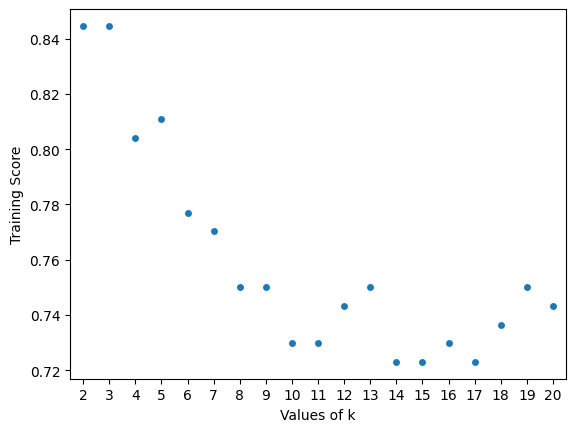

In [24]:
ax = sns.stripplot(x=K, y=training) 
ax.set(xlabel='Values of k', ylabel='Training Score')   
plt.show()

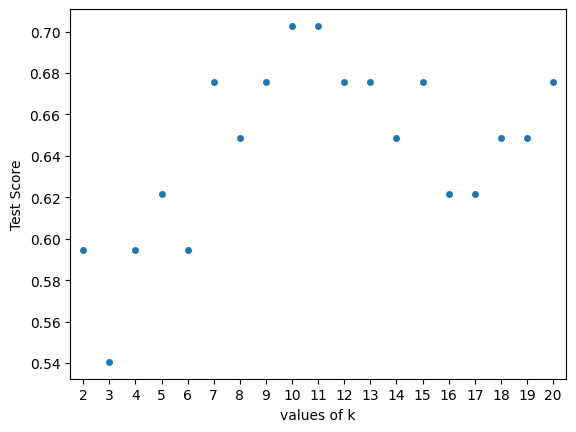

In [25]:
ax = sns.stripplot(x=K, y=test); 
ax.set(xlabel ='values of k', ylabel ='Test Score') 

plt.show() 

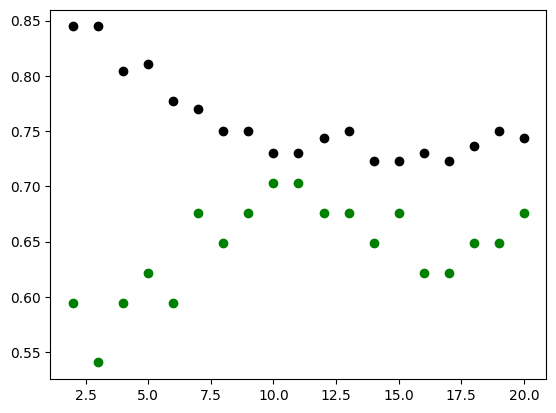

In [26]:
plt.scatter(K, training, color ='k') 
plt.scatter(K, test, color ='g') 
plt.show() 